In [1]:
!wget -q https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/image_data.zip

In [2]:
!unzip image_data.zip

Archive:  image_data.zip
  inflating: image_data/car3.png     
  inflating: image_data/cat.jpeg     
  inflating: image_data/cat2.jpg     
   creating: image_data/data/
   creating: image_data/data/dogs/
  inflating: image_data/data/dogs/dog.1.jpg  
  inflating: image_data/data/dogs/dog.10.jpg  
  inflating: image_data/data/dogs/dog.100.jpg  
  inflating: image_data/data/dogs/dog.101.jpg  
  inflating: image_data/data/dogs/dog.102.jpg  
  inflating: image_data/data/dogs/dog.103.jpg  
  inflating: image_data/data/dogs/dog.104.jpg  
  inflating: image_data/data/dogs/dog.105.jpg  
  inflating: image_data/data/dogs/dog.106.jpg  
  inflating: image_data/data/dogs/dog.107.jpg  
  inflating: image_data/data/dogs/dog.108.jpg  
  inflating: image_data/data/dogs/dog.109.jpg  
  inflating: image_data/data/dogs/dog.11.jpg  
  inflating: image_data/data/dogs/dog.110.jpg  
  inflating: image_data/data/dogs/dog.111.jpg  
  inflating: image_data/data/dogs/dog.112.jpg  
  inflating: image_data/data/dog

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

# Data Preparation

In [4]:
main_folder = "image_data/data/"
class_names = os.listdir(main_folder)
class_names

['dogs', 'Humans', 'horses']

In [5]:
x = []
y = []
for folder in os.listdir(main_folder):
  image_list = os.listdir(main_folder+folder)
  for img_name in image_list:
    img = image.load_img(main_folder+folder+"/"+img_name,target_size=(150,150))
    img = image.img_to_array(img)
    x.append(img)
    y.append(class_names.index(folder))
    

In [6]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [7]:
x = np.array(x)
print(x.shape)
y = to_categorical(y)# onehot encode the labels
print(y.shape)

(606, 150, 150, 3)
(606, 3)


In [8]:
#scale the data
x = x/255

In [9]:
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [10]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

# Modelling without transfer learning

In [11]:
from tensorflow.keras import models,layers

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(filters=20,kernel_size=(5,5),input_shape=(150,150,3),activation = 'relu'))
model.add(layers.Conv2D(30,(5,5),activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(40,(3,3),activation='relu'))
model.add(layers.Conv2D(60,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(180,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
16/16 [==============================] - 34s 103ms/step - loss: 1.5676 - accuracy: 0.3430 - val_loss: 1.0986 - val_accuracy: 0.3361
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0995 - accuracy: 0.3264 - val_loss: 1.0990 - val_accuracy: 0.3115
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0983 - accuracy: 0.3430 - val_loss: 1.0991 - val_accuracy: 0.3115
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0979 - accuracy: 0.3430 - val_loss: 1.0960 - val_accuracy: 0.3361
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0915 - accuracy: 0.4236 - val_loss: 1.0873 - val_accuracy: 0.3361
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0892 - accuracy: 0.4029 - val_loss: 1.0843 - val_accuracy: 0.3361
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0465 - accuracy: 0.3967 - val_loss: 1.0208 - val_accuracy: 0.3689
Epoch 8/20


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 20)      1520      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 142, 142, 30)      15030     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 71, 71, 30)        0         
_________________________________________________________________
dropout (Dropout)            (None, 71, 71, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 69, 40)        10840     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 67, 67, 60)        21660     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 60)        0

#Overfitting

Data augmentation

In [15]:
from tensorflow import keras

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(150,
                                                              150,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [16]:
model = models.Sequential()

model.add(layers.Conv2D(filters=20,kernel_size=(5,5),input_shape=(150,150,3),activation = 'relu'))
model.add(layers.Conv2D(30,(5,5),activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.7))

model.add(layers.Conv2D(40,(3,3),activation='relu'))
model.add(layers.Conv2D(60,(3,3),activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.7))
model.add(layers.Flatten())

model.add(layers.Dense(180,activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [17]:
import tensorflow as tf
Adam = tf.keras.optimizers.Adam(
       learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
       name='Adam'
       )

In [56]:
model.compile(loss='categorical_crossentropy', optimizer=Adam, metrics=['accuracy'])
model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
16/16 [==============================] - 2s 65ms/step - loss: 1.0334 - accuracy: 0.6198 - val_loss: 1.0880 - val_accuracy: 0.3607
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 1.0869 - accuracy: 0.4504 - val_loss: 1.1051 - val_accuracy: 0.3115
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 1.0449 - accuracy: 0.4669 - val_loss: 1.0795 - val_accuracy: 0.4016
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 1.2756 - accuracy: 0.4587 - val_loss: 1.0872 - val_accuracy: 0.3197
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.9969 - accuracy: 0.5331 - val_loss: 1.0633 - val_accuracy: 0.4262
Epoch 6/20
16/16 [==============================] - 1s 52ms/step - loss: 1.0265 - accuracy: 0.4876 - val_loss: 1.0065 - val_accuracy: 0.5000
Epoch 7/20
16/16 [==============================] - 1s 52ms/step - loss: 0.9435 - accuracy: 0.5372 - val_loss: 1.0472 - val_accuracy: 0.4426
Epoch 8/20
16

In [ ]:
model.summary()

# Transfer Learning using ResNet50

In [ ]:
from tensorflow.keras.applications import resnet50

model2 = resnet50.ResNet50(weights='imagenet')
model2.summary()

In [ ]:
# load the model without last layer

input_layer = layers.Input(shape=(150,150,3))

model2 = resnet50.ResNet50(weights='imagenet',include_top=False,input_tensor=input_layer)
model2.summary()

In [ ]:
last_layer = model2.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(3,activation='softmax')(flat)

new_model = models.Model(inputs=input_layer,outputs=output_layer)
new_model.summary()

In [41]:
# we will freeze all layers except the last layer
for layer in new_model.layers[:-1]:
  layer.trainable=False

In [ ]:
new_model.summary()

In [43]:
x = []
y = []
for folder in os.listdir(main_folder):
  image_list = os.listdir(main_folder+folder)
  for img_name in image_list:
    img = image.load_img(main_folder+folder+"/"+img_name,target_size=(150,150))
    img = image.img_to_array(img)
    img = resnet50.preprocess_input(img)
    x.append(img)
    y.append(class_names.index(folder))
    

In [44]:
x = np.array(x)
print(x.shape)
y = to_categorical(y)# onehot encode the labels
print(y.shape)

(606, 150, 150, 3)
(606, 3)


In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [46]:
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
new_model.fit(xtrain,ytrain,epochs=20,batch_size=64,verbose=True,validation_data=(xtest,ytest))

Epoch 1/20
8/8 [==============================] - 7s 477ms/step - loss: 0.6775 - accuracy: 0.8781 - val_loss: 0.1122 - val_accuracy: 0.9918
Epoch 2/20
8/8 [==============================] - 1s 134ms/step - loss: 0.0760 - accuracy: 0.9897 - val_loss: 0.0612 - val_accuracy: 0.9836
Epoch 3/20
8/8 [==============================] - 1s 134ms/step - loss: 1.3275e-07 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 0.9836
Epoch 4/20
8/8 [==============================] - 1s 135ms/step - loss: 0.0055 - accuracy: 0.9979 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 1s 134ms/step - loss: 5.3446e-08 - accuracy: 1.0000 - val_loss: 9.5835e-05 - val_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 1s 134ms/step - loss: 2.9802e-08 - accuracy: 1.0000 - val_loss: 1.9237e-05 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 1s 135ms/step - loss: 2.4876e-08 - accuracy: 1.0000 - val_loss: 9.3281e-06 - val_accuracy:

In [57]:
from tensorflow.keras.applications import resnet50

def predict(img_name):
  img = image.load_img(img_name,target_size=(150,150))
  img = image.img_to_array(img)
  plt.imshow(img.astype('int32'))
  plt.show()
  img = resnet50.preprocess_input(img)
  prediction = model.predict(img.reshape(1,150,150,3))
  output = np.argmax(prediction)
  print(class_names[output])

In [58]:
!wget -q https://www.cdc.gov/healthypets/images/pets/cute-dog-headshot.jpg
#!wget -q https://thumbs.dreamstime.com/b/southeast-asian-businessman-full-length-body-confident-young-standing-isolated-white-background-malay-male-model-95956732.jpg
#!wget -q https://theplaidhorse.s3.amazonaws.com/media/uploads/2020/08/AdobeStock_326500445-1-scaled.jpeg

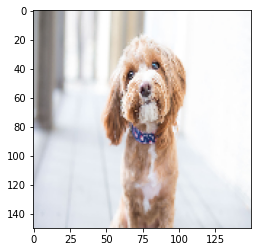

dogs


In [59]:
predict("cute-dog-headshot.jpg")